In [45]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/310.8 MB ? eta -:--:--
                                            0.0/310.8 MB 640.0 kB/s eta 0:08:06
                                            0.0/310.8 MB 393.8 kB/s eta 0:13:09
                                            0.1/310.8 MB 930.9 kB/s eta 0:05:34
                                              0.2/310.8 MB 1.1 MB/s eta 0:04:50
                                              0.3/310.8 MB 1.2 MB/s eta 0:04:16
                                              0.5/310.8 MB 1.8 MB/s eta 0:02:48
                                              0.5/310.8 MB 1.8 MB/s eta 0:02:48
                                              1.0/310.8 MB 2.8 MB/s eta 0:01:50
                                              1.1/310.8 MB 2.8 MB/s eta 0:01:52
                                              1.4/310.8 MB 3.0 MB/s eta 0:01:43
                                              1.9

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from sklearn.metrics import precision_score, recall_score, f1_score

from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00133-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00134-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00135-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00136-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00137-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00138-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00139-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00140-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00141-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00142-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00143-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00144-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00145-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00146-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00147-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00148-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00149-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00150-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00151-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00152-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00153-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00154-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00155-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00156-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00157-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00158-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00159-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00160-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00161-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00162-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00163-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00164-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00165-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]
# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [4]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-2b697ec1-7fc8-4ebc-9c64-4e6989a96ecc-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,7.648174,162.00,6.00,64.0,3.922505e-01,3.922505e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.295083e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
1,0.000000,0.00,1.00,64.0,1.048576e+06,1.048576e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312882e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.000000,54.00,6.00,64.0,3.816339e+00,3.816339e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.307230e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
3,0.147718,457.62,1.28,62.7,2.135244e+01,2.135244e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.21,0.06,0.42,1.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,574.42,42.0,111.66,51.827250,21.811759,53.32,8.312407e+07,9.5,9.967512,30.891569,3668.531605,0.14,141.55,DDoS-ICMP_Flood
4,4.566070,108.00,6.00,64.0,4.380144e-01,4.380144e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.295119e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912194,0.001351,56.16,6.33,64.0,3.334845e+01,3.334845e+01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.97,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,581.04,54.0,59.04,55.091702,2.047879,55.08,8.309345e+07,9.5,10.493864,2.899992,30.279612,0.14,141.55,DDoS-SYN_Flood
9912195,1.179212,84.24,6.00,64.0,7.133521e-01,7.133521e-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.56,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336222e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
9912196,0.145184,22515.86,16.89,64.0,1.453588e+04,1.453588e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.47,1.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,538.78,50.0,63.78,51.065175,3.635763,51.06,8.302843e+07,9.5,10.102448,5.149768,103.694552,0.13,141.55,DoS-UDP_Flood
9912197,0.000000,54.00,6.00,64.0,9.472442e+01,9.472442e+01,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.334500e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912199 entries, 0 to 9912198
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [6]:
df['label'].value_counts()

DDoS-ICMP_Flood            1528359
DDoS-UDP_Flood             1146080
DDoS-TCP_Flood              955809
DDoS-PSHACK_Flood           870895
DDoS-SYN_Flood              863455
DDoS-RSTFINFlood            858923
DDoS-SynonymousIP_Flood     763290
DoS-UDP_Flood               704585
DoS-TCP_Flood               567085
DoS-SYN_Flood               431334
BenignTraffic               233341
Mirai-greeth_flood          210739
Mirai-udpplain              188861
Mirai-greip_flood           159073
DDoS-ICMP_Fragmentation      96529
MITM-ArpSpoofing             65274
DDoS-UDP_Fragmentation       60670
DDoS-ACK_Fragmentation       59923
DNS_Spoofing                 38156
Recon-HostDiscovery          28577
Recon-OSScan                 20828
Recon-PortScan               17670
DoS-HTTP_Flood               15100
VulnerabilityScan             7785
DDoS-HTTP_Flood               6188
DDoS-SlowLoris                5101
DictionaryBruteForce          2861
BrowserHijacking              1225
CommandInjection    

In [7]:
df=df[df["label"].str.contains("Recon-PortScan|DDoS-TCP_Flood|DDoS-PSHACK_Flood|DDoS-SYN_Flood|DDoS-RSTFINFlood|DDoS-SynonymousIP_Flood|DoS-UDP_Flood|DoS-TCP_Flood|DoS-SYN_Flood|BenignTraffic|Mirai-greeth_flood|Mirai-udpplain|Mirai-greip_flood|DDoS-ICMP_Fragmentation|MITM-ArpSpoofing|DDoS-ACK_Fragmentation|DDoS-UDP_Fragmentation|DNS_Spoofing|Recon-HostDiscovery|Recon-OSScanRecon-PortScan|DoS-HTTP_Flood|VulnerabilityScan|DDoS-HTTP_Flood|DDoS-SlowLoris|DictionaryBruteForce|SqlInjection|BrowserHijacking|CommandInjection|Backdoor_Malware|XSS|Uploading_Attack|Recon-PingSweep") == False]
df=df.reset_index(drop=True)
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,1.048576e+06,1.048576e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312882e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.147718,457.62,1.28,62.70,2.135244e+01,2.135244e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.21,0.06,0.42,1.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,574.42,42.0,111.66,51.827250,21.811759,53.32,8.312407e+07,9.5,9.967512,30.891569,3668.531605,0.14,141.55,DDoS-ICMP_Flood
2,0.000000,0.00,0.99,63.36,1.334561e+01,1.334561e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.36,42.0,42.36,42.018474,0.079424,42.18,8.315064e+07,9.5,9.167207,0.113684,0.323102,0.02,141.55,DDoS-ICMP_Flood
3,0.000000,0.00,0.98,62.72,2.005073e+00,2.005073e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.90,42.0,42.54,42.046947,0.150472,42.36,8.314976e+07,9.5,9.170325,0.214554,0.780305,0.03,141.55,DDoS-ICMP_Flood
4,0.000002,12.53,1.15,63.69,2.702536e+04,2.702536e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.05,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,506.51,42.0,103.67,49.418303,18.678232,45.70,8.312482e+07,9.5,9.853454,26.441241,1484.313655,0.35,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549182,0.000000,0.00,1.00,64.00,3.897388e+00,3.897388e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.313220e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1549183,0.000000,0.00,1.00,64.00,2.215559e+01,2.215559e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312856e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1549184,0.000000,0.00,1.00,64.00,1.453845e+00,1.453845e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314945e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1549185,0.000000,0.00,1.00,64.00,1.548731e+01,1.548731e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312400e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [8]:
#change Multi-class to binary-class
#df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [9]:
df['label'].unique()

array(['DDoS-ICMP_Flood', 'Recon-OSScan'], dtype=object)

In [10]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,1.048576e+06,1.048576e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312882e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
1,0.147718,457.62,1.28,62.70,2.135244e+01,2.135244e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.21,0.06,0.42,1.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,574.42,42.0,111.66,51.827250,21.811759,53.32,8.312407e+07,9.5,9.967512,30.891569,3668.531605,0.14,141.55,0
2,0.000000,0.00,0.99,63.36,1.334561e+01,1.334561e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.36,42.0,42.36,42.018474,0.079424,42.18,8.315064e+07,9.5,9.167207,0.113684,0.323102,0.02,141.55,0
3,0.000000,0.00,0.98,62.72,2.005073e+00,2.005073e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.90,42.0,42.54,42.046947,0.150472,42.36,8.314976e+07,9.5,9.170325,0.214554,0.780305,0.03,141.55,0
4,0.000002,12.53,1.15,63.69,2.702536e+04,2.702536e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.05,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,506.51,42.0,103.67,49.418303,18.678232,45.70,8.312482e+07,9.5,9.853454,26.441241,1484.313655,0.35,141.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549182,0.000000,0.00,1.00,64.00,3.897388e+00,3.897388e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.313220e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
1549183,0.000000,0.00,1.00,64.00,2.215559e+01,2.215559e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312856e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
1549184,0.000000,0.00,1.00,64.00,1.453845e+00,1.453845e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314945e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
1549185,0.000000,0.00,1.00,64.00,1.548731e+01,1.548731e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.312400e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0


# Train test split

In [11]:
x=df.drop(columns=['label'])
y=df['label']

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 1239349
Testing set: 309838


In [14]:
y_test.value_counts()

0    305672
1      4166
Name: label, dtype: int64

In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred)
log_rec=recall_score(y_test,pred)
log_f1=f1_score(y_test,pred)

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.999060799514585
precision: 0.9370629370629371
recall:  0.9971195391262602
f1:  0.9661588556808931


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)


rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred)
rf_rec=recall_score(y_test,pred)
rf_f1=f1_score(y_test,pred)

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.999993545013846
precision: 0.9995201535508638
recall:  1.0
f1:  0.9997600191984641


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)

ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred)
ada_rec=recall_score(y_test,pred)
ada_f1=f1_score(y_test,pred)

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 1.0
precision: 1.0
recall:  1.0
f1:  1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)

gb_acc=clf3.score(x_test,y_test)
pred=clf3.predict(x_test)

gb_prec=precision_score(y_test,pred)
gb_rec=recall_score(y_test,pred)
gb_f1=f1_score(y_test,pred)

print('accuracy:',gb_acc)
print('precision:', gb_prec)
print('recall: ', gb_rec)
print('f1: ', gb_f1)

# Neural network

In [19]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger

In [20]:
input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(1, activation='sigmoid')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [21]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test,y_test), callbacks=callbacks_list)


Epoch 1/50
19346/19365 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9997
Epoch 1: val_accuracy improved from -inf to 0.99997, saving model to nn.hdf5
19365/19365 [==============================] - 33s 2ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 3.1236e-04 - val_accuracy: 1.0000
Epoch 2/50
19340/19365 [============================>.] - ETA: 0s - loss: 8.1990e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.99997
19365/19365 [==============================] - 30s 2ms/step - loss: 8.3262e-04 - accuracy: 1.0000 - val_loss: 4.5135e-04 - val_accuracy: 1.0000
Epoch 3/50
19349/19365 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9999
Epoch 3: val_accuracy did not improve from 0.99997
19365/19365 [==============================] - 31s 2ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 2.7777e-04 - val_accuracy: 0.9999
Epoch 4/50
19351/19365 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 

19344/19365 [============================>.] - ETA: 0s - loss: 1.1495e-04 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 0.99999
19365/19365 [==============================] - 33s 2ms/step - loss: 1.1484e-04 - accuracy: 1.0000 - val_loss: 5.0747e-04 - val_accuracy: 1.0000
Epoch 29/50
19363/19365 [============================>.] - ETA: 0s - loss: 1.1623e-04 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.99999
19365/19365 [==============================] - 32s 2ms/step - loss: 1.1622e-04 - accuracy: 1.0000 - val_loss: 5.0793e-04 - val_accuracy: 1.0000
Epoch 30/50
19345/19365 [============================>.] - ETA: 0s - loss: 1.1549e-04 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.99999
19365/19365 [==============================] - 31s 2ms/step - loss: 1.1538e-04 - accuracy: 1.0000 - val_loss: 5.0772e-04 - val_accuracy: 1.0000
Epoch 31/50
19363/19365 [============================>.] - ETA: 0s - loss: 1.1553e-04 - accuracy: 1.0000
Epoc

Text(0, 0.5, 'accuracy')

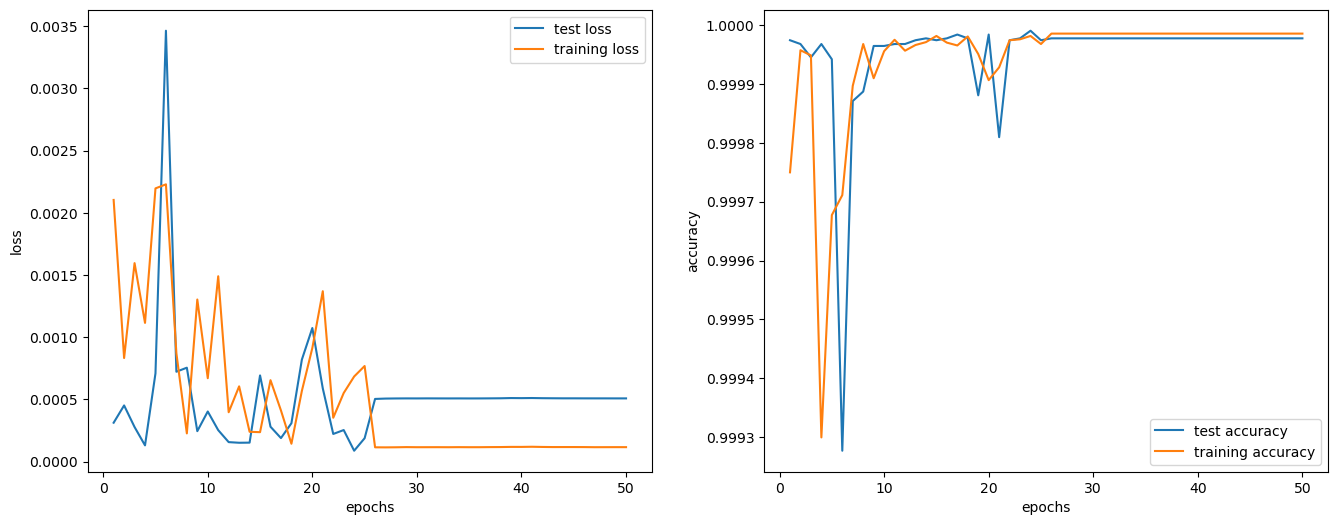

In [22]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,51,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,51,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,51,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,51,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

7846/7846 [==============================] - 6s 761us/step
Accuracy of dnn model: 100.0 %
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


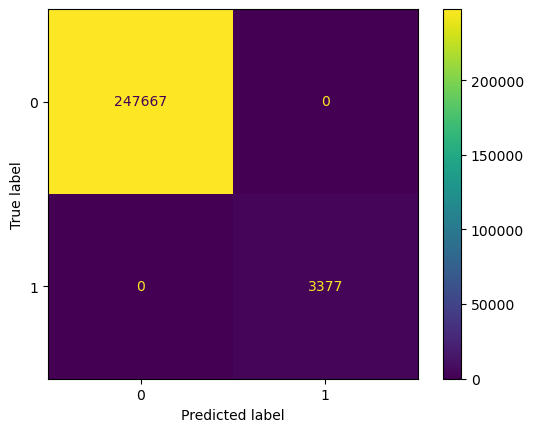

In [22]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
proba_dnn=dnn.predict(x_test)

#getting the classes, i.e. 0 or 1
dnn_pred=(proba_dnn>0.5).astype('int').flatten()

# performance metrics
print('Accuracy of dnn model:', accuracy_score(y_test,dnn_pred)*100,'%' )
print('Precision score: ',precision_score(y_test, dnn_pred))
print('Recall score: ',recall_score(y_test, dnn_pred))
print('F1 score: ',f1_score(y_test, dnn_pred))

ConfusionMatrixDisplay.from_predictions(y_test, dnn_pred)

Text(0, 0.5, 'Accuracy')

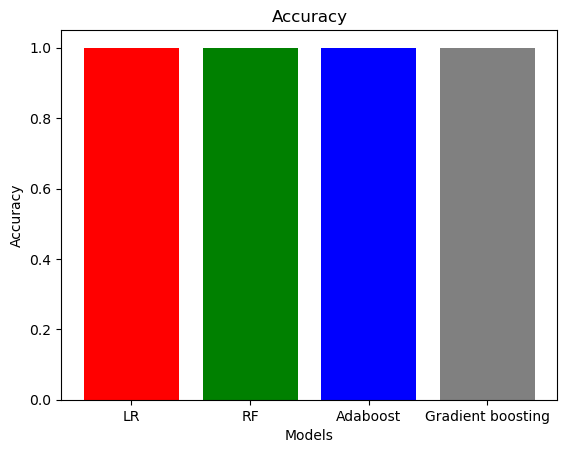

In [62]:
plt.bar(['LR','RF','Adaboost','Gradient boosting'],[log_acc,rf_acc, ada_acc,gb_acc], color=['red','green','blue','grey'])
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')